In [1]:
#import
# Your solution goes here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


### Load and clean heart-attack dataset 

In [2]:
# Your solution goes here
heart_attack_data = pd.read_csv('heart-attack.csv', na_values={'?'})

print ( 'shape: ',heart_attack_data.shape,'nan count: \n' , heart_attack_data.isna().sum() )
heart_attack_data.dropna(subset=['gender', 'age', 'trestbps','chol'], how='any', inplace=True)

heart_attack_data['gender'] = heart_attack_data['gender'].map({0:'F', 1:'M'} )
heart_attack_data['dataset'] = "heart"



shape:  (293, 14) nan count: 
 age           0
gender        0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        265
num           0
dtype: int64


### Load diabetes dataset (already clean) 

In [3]:
diabetes_data = pd.read_csv('diabetes.csv', na_values={'?'})
diabetes_data['gender'] = "F"
diabetes_data['dataset'] = "diabetes"
diabetes_data.rename(columns={"Age" : "age", "BloodPressure" : "trestbps"}, inplace=True)
print ( 'shape: ',diabetes_data.shape,'nan count: \n' , diabetes_data.isna().sum())
# heart_attack_data.dropna(subset=['gender', 'age', 'trestbps','chol'], how='any', inplace=True)



shape:  (768, 11) nan count: 
 Pregnancies                 0
Glucose                     0
trestbps                    0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
age                         0
Outcome                     0
gender                      0
dataset                     0
dtype: int64


### Combine datasets

In [4]:
frames = [heart_attack_data, diabetes_data]
combined_data = pd.concat(frames,  join='inner')

print(f" Combined data... Shape: {combined_data.shape} head (10): ")
combined_data.head(10)


 Combined data... Shape: (1037, 4) head (10): 


,age,gender,trestbps,dataset
0,28,M,130.0,heart
1,29,M,120.0,heart
3,30,F,170.0,heart
4,31,F,100.0,heart
5,32,F,105.0,heart
6,32,M,110.0,heart
7,32,M,125.0,heart
8,33,M,120.0,heart
9,34,F,130.0,heart
10,34,M,150.0,heart


### Boxplots


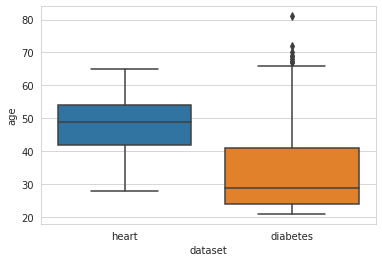

In [5]:
sns.set_style('whitegrid')
plot_age = sns.boxplot(x='dataset', y='age', data=combined_data)

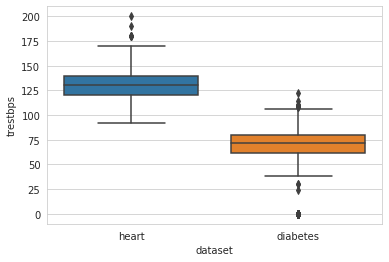

In [6]:
plot_trestbps = sns.boxplot(x='dataset', y='trestbps', data=combined_data)

### Histograms 

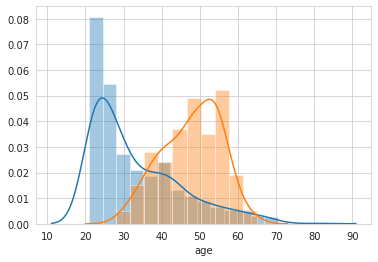

In [8]:
dist_plot_age = sns.distplot(combined_data.loc[combined_data['dataset'] == 'diabetes']['age'])
dist_plot_age = sns.distplot(combined_data.loc[combined_data['dataset'] == 'heart']['age'])


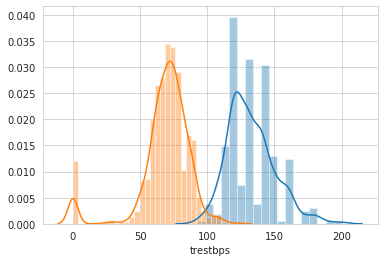

In [9]:
dist_plot_trestbps = sns.distplot(combined_data.loc[combined_data['dataset'] == 'heart']['trestbps'])
dist_plot_trestbps = sns.distplot(combined_data.loc[combined_data['dataset'] == 'diabetes']['trestbps'])

### Binned pointplot 

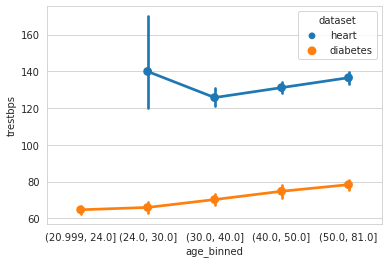

In [10]:
bins = [30, 40, 50, 60, 70, 80]

combined_data['age_binned'] = pd.qcut(combined_data['age'], 5)

bp_vs_age_bin = sns.pointplot(y='trestbps', x='age_binned', data=combined_data, hue='dataset')
# bp_vs_age_bin = sns.pointplot(y='trestbps', x='age_binned', data=combined_data.loc[combined_data['dataset'] == 'heart'])

### Interpretation

Text(0.5, 1.0, 'age vs. dataset for only female respondents')

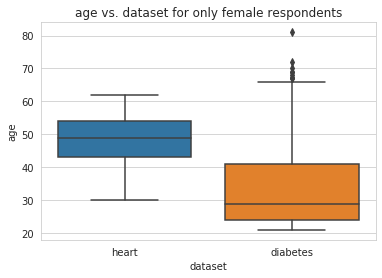

In [11]:
plot_age = sns.boxplot(x='dataset', y='age', data=combined_data.loc[combined_data['gender'] == 'F'])
plot_age.set_title("age vs. dataset for only female respondents")
# print( combined_data.loc[combined_data['gender'] == 'F'].loc[ combined_data['dataset'] == 'heart'].shape() )